In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Salary database
df = pd.read_csv("http://www.ppgia.pucpr.br/~jean.barddal/datascience/Salaries.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


In [43]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [44]:
df.drop('Unnamed: 0', axis = 1, inplace = True)


In [45]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [46]:
# Filtering people with rank = 'Prof' and getting the salary average
df[df['rank'] == 'Prof']['salary'].mean()

126772.1090225564

In [47]:
df[df['rank'] == 'AsstProf']['salary'].mean()

80775.98507462686

In [48]:
df[df['rank'] == 'AssocProf']['salary'].mean()

93876.4375

In [49]:
# Group by (always accompanied by a statistical function)

df.groupby('rank')['salary'].min()

rank
AssocProf    62884
AsstProf     63100
Prof         57800
Name: salary, dtype: int64

In [50]:
df.groupby('rank')['salary'].max()

rank
AssocProf    126431
AsstProf      97032
Prof         231545
Name: salary, dtype: int64

In [51]:
# Average, minimum and maximum salary (by sex)
df.groupby('sex')['salary'].max()

sex
Female    161101
Male      231545
Name: salary, dtype: int64

In [52]:
df.groupby('sex')['salary'].min()

sex
Female    62884
Male      57800
Name: salary, dtype: int64

In [53]:
# Average, min and max salary by sex, ranking and discipline
# Dependent and Independent variables
# Independent Variables: variables that we use for forecasting
# Dependent Variables: variables that we want to predict
df.groupby(['discipline', 'rank', 'sex'])['salary', 'yrs.service'].mean()

/home/alebark/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


salary  yrs.service
discipline rank      sex                               
A          AssocProf Female   72128.500000    15.500000
                     Male     85048.863636    13.136364
           AsstProf  Female   72933.333333     2.500000
                     Male     74269.611111     2.388889
           Prof      Female  109631.875000    16.125000
                     Male    120619.260163    24.983740
B          AssocProf Female   99435.666667     8.833333
                     Male    101621.531250    11.281250
           AsstProf  Female   84189.800000     2.600000
                     Male     84647.078947     2.315789
           Prof      Female  131836.200000    17.900000
                     Male    133518.360000    21.504000

In [54]:
### Salary distribution

Text(0.5, 1.0, 'Salaty distribution')

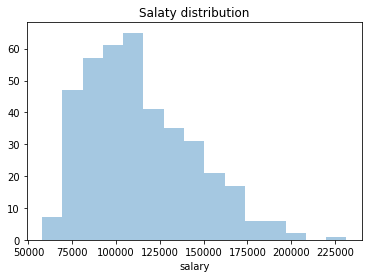

In [55]:
# Numeric variable histogram
sns.distplot(df['salary'], kde = False, bins=15)
plt.title('Salaty distribution')

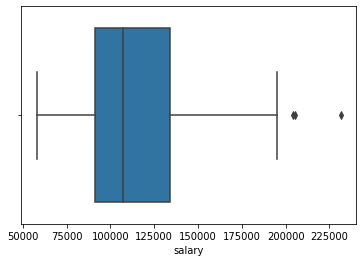

In [56]:
# Box plot
sns.boxplot(df['salary'])

# External bars: whiskers (delimits "acceptable" values)

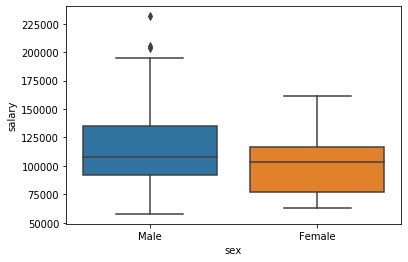

In [57]:
# Comparison of categories with boxplots
# Salary by sex
sns.boxplot(x=df['sex'], y=df['salary'])

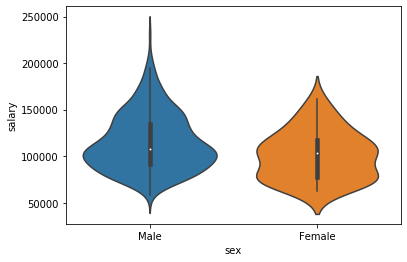

In [58]:
sns.violinplot(x=df['sex'], y=df['salary'])

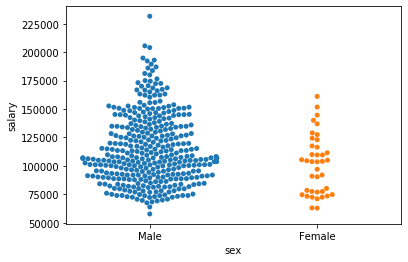

In [59]:
sns.swarmplot(x=df['sex'], y=df['salary'])

In [60]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/kobe_shots.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [62]:
df.isna().sum() #NaN (Not a Number)

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [63]:
# Removing lines whose shot_made_flag variable is missing
df = df[~df['shot_made_flag'].isna()] #not -> ~

In [64]:
df.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [65]:
df['action_type'].unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Reverse Dunk Shot', 'Slam Dunk Shot',
       'Driving Layup Shot', 'Turnaround Jump Shot', 'Reverse Layup Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Jump Hook Shot',
       'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Tip Shot',
       'Running Reverse Layup Shot', 'Driving Finger Roll Layup Shot',
       'Fadeaway Bank shot', 'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Turnaround Bank shot', 'Reverse Slam Dunk Shot',
   

In [66]:
df['action_type'].nunique()

55

In [67]:
# Between (range search)
# Selecting shots from 1 to 5 meters
df[df['shot_distance'].between(1,5)]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
14,Jump Shot,Jump Shot,80,20000019,33.9973,-23,47,-118.2928,1,1,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,15
43,Jump Shot,Jump Shot,233,20000047,34.0293,49,15,-118.2208,8,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,44
51,Layup Shot,Layup,446,20000047,34.0353,-12,9,-118.2818,1,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,52
61,Layup Shot,Layup,232,20000049,33.9953,22,49,-118.2478,0,2,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,62
63,Driving Layup Shot,Layup,353,20000049,34.0233,56,21,-118.2138,0,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30660,Layup Shot,Layup,238,49900087,34.0263,-14,18,-118.2838,10,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-16,LAL @ IND,IND,30661
30662,Jump Shot,Jump Shot,259,49900087,33.9913,-8,53,-118.2778,8,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-16,LAL @ IND,IND,30663
30665,Layup Shot,Layup,280,49900087,34.0263,-14,18,-118.2838,5,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-16,LAL @ IND,IND,30666
30678,Driving Layup Shot,Layup,181,49900088,34.0283,14,16,-118.2558,3,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30679


In [68]:
# Isin -> categorical variables
df[df['combined_shot_type'].isin(['Dunk', 'Layup'])]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
25,Layup Shot,Layup,332,20000019,34.0443,0,0,-118.2698,2,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,26
41,Layup Shot,Layup,219,20000047,34.0403,7,4,-118.2628,10,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,42
45,Layup Shot,Layup,289,20000047,34.0403,-4,4,-118.2738,3,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30665,Layup Shot,Layup,280,49900087,34.0263,-14,18,-118.2838,5,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-16,LAL @ IND,IND,30666
30671,Driving Layup Shot,Layup,25,49900088,34.0443,0,0,-118.2698,8,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30672
30678,Driving Layup Shot,Layup,181,49900088,34.0283,14,16,-118.2558,3,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30679
30679,Layup Shot,Layup,212,49900088,34.0443,0,0,-118.2698,0,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30680


In [69]:
# Ordering
# Sort the shots according to distance (shot_distance)
df.sort_values(['shot_distance', 'action_type'])[['action_type', 'shot_distance']]

,action_type,shot_distance
144,Alley Oop Dunk Shot,0
194,Alley Oop Dunk Shot,0
242,Alley Oop Dunk Shot,0
244,Alley Oop Dunk Shot,0
649,Alley Oop Dunk Shot,0
...,...,...
6650,Jump Shot,74
13026,Jump Shot,74
29137,Jump Shot,74
27991,Jump Shot,77


In [70]:
# Feature engineering
# From game_date, create year, month and day

In [71]:
# Steps:
# 1 - Transform the string (text) into data (Python type)
# 2 - Calculate year, month and day

In [72]:
# 1 - Transforming the string into a date:
df['date'] = pd.to_datetime(df['game_date'])

In [73]:
df.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,date
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,2000-10-31
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,2000-10-31
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,2000-10-31
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,2000-10-31
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,2000-10-31


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   action_type         25697 non-null  object        
 1   combined_shot_type  25697 non-null  object        
 2   game_event_id       25697 non-null  int64         
 3   game_id             25697 non-null  int64         
 4   lat                 25697 non-null  float64       
 5   loc_x               25697 non-null  int64         
 6   loc_y               25697 non-null  int64         
 7   lon                 25697 non-null  float64       
 8   minutes_remaining   25697 non-null  int64         
 9   period              25697 non-null  int64         
 10  playoffs            25697 non-null  int64         
 11  season              25697 non-null  object        
 12  seconds_remaining   25697 non-null  int64         
 13  shot_distance       25697 non-null  int64     

In [75]:
# Year, month, day, day of the week, day of the year
df['year'] = df['date'].dt.year

In [76]:
df['month'] = df['date'].dt.month

In [77]:
df['day'] =df['date'].dt.day

In [80]:
df['day_of_week'] = df['date'].dt.dayofweek
# Converting to the name of the day
# Apply

# 2 steps:
# 1 - Create the conversion function
# 2 - Apply to convert the values

def readable_day(d):
    if d == 0:
        return 'Monday'
    if d == 1:
        return 'Tuesday'
    if d == 2:
        return 'Wednesday'
    if d == 4:
        return 'Thursday'
    if d == 4:
        return 'Friday'
    if d == 5:
        return 'Sataurday'
    if d == 6:
        return 'Sunday'
    
df['day_of_the_week'] = df['day_of_week'].apply(readable_day)

In [81]:
df['day_of_the_year'] = df['date'].dt.dayofyear

In [82]:
df.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,matchup,opponent,shot_id,date,year,month,day,day_of_week,day_of_the_week,day_of_the_year
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,LAL @ POR,POR,2,2000-10-31,2000,10,31,1,Tuesday,305
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,LAL @ POR,POR,3,2000-10-31,2000,10,31,1,Tuesday,305
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,LAL @ POR,POR,4,2000-10-31,2000,10,31,1,Tuesday,305
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,LAL @ POR,POR,5,2000-10-31,2000,10,31,1,Tuesday,305
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,LAL @ POR,POR,6,2000-10-31,2000,10,31,1,Tuesday,305
